# 5.1 Decision Tree와  불순도

### 트리(그래프) 
1. 트리 용어
- 노드(node): 트리를 구성하는 기본 원소
-루트 노드(root node/root): 트리에서 부모가 없는 최상위 노드, 트리의 시작점
- 부모 노드(parent node): 루트 노드 방향으로 직접 연결된 노드
- 자식 노드(child node): 루트 노드 반대방향으로 직접 연결된 노드
- 형제 노드(siblings node): 같은 부모 노드를 갖는 노드들
- 리프 노드(leaf node/leaf): 루트 노드를 제외한 차수가 1인 정점을 뜻한다. 쉽게 말해 자식이 없는 노드. 단말 노드라 부르기도 한다.
- 경로(path): 한 노드에서 다른 한 노드에 이르는 길 사이에 있는 노드들의 순서
- 길이(length): 출발 노드에서 도착 노드까지 거치는 간선의 개수
- 깊이(depth): 루트 경로의 길이
- 레벨(level): 루트 노드(level=0)부터 노드까지 연결된 간선 수의 합
- 높이(height): 가장 긴 루트 경로의 길이
- 차수(degree): 각 노드의 자식의 개수[2]
- 트리의 차수(degree of tree): 트리의 최대 차수

- 크기(size): 노드의 개수
- 너비(width): 가장 많은 노드를 갖고 있는 레벨의 크기
- 내부 정점(internal vertex): 차수가 2 이상인 정점
- 포레스트(forest): 서로 독립인 트리들의 모임
- 방향 트리(directed tree): 방향을 무시하고 생각했을 때 트리인 유향 그래프는 방향 트리이다. 자료구조의 트리는 방향 트리의 일종


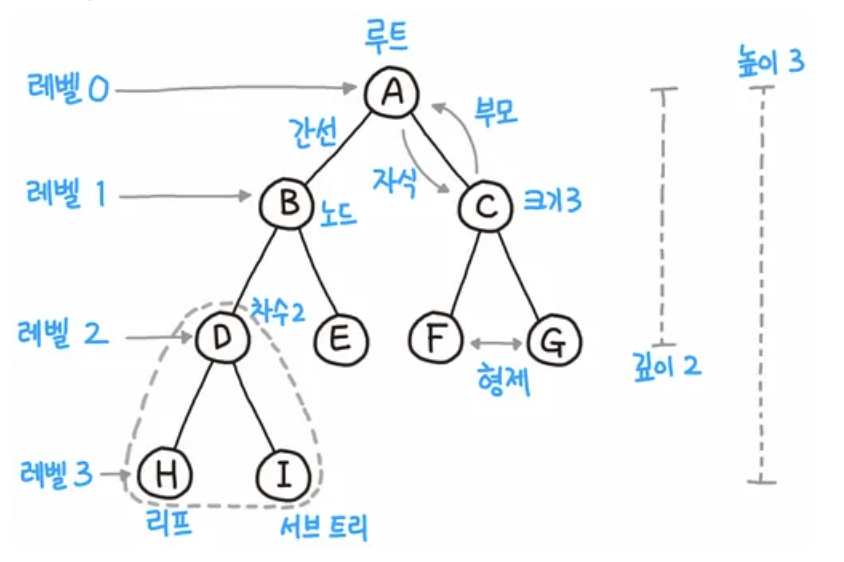


## Decision Tree (결정트리 , 의사결정나무)
- 예, 아니오에 대한 질문을 반복하며 정답을 찾아 학습하는 알고리즘 
    - 질문을 던져서 대상을 좁혀나가는 ‘스무고개’ 놀이와 비슷한 개념
- 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타낸다
- 모양이 ‘나무’와 같다고 해서 의사결정나무
- 분류와 회귀가 모두 가능한 지도학습모델, 즉 범주나 연속형 수치 모두 예측할 수 있음. 
    - 분류 과정 :새로운 데이터가 terminal node에 속한다는 정보를 확인 후 terminal node에서 빈도가 높은 범주에 새로운 데이터 분류 
    - 회귀 과정 : 해당 terminal node의 종속변수(y)의 평균을 예측값으로 반환. 이 때 예측값의 종류는 terminal node 개수와 일치함. 만약 terminal node 수가 3개뿐이라면 새로운 데이터가 몇 개 이더라도 의사결정나무는 딱 3종류의 답만을 출력



### 예시 
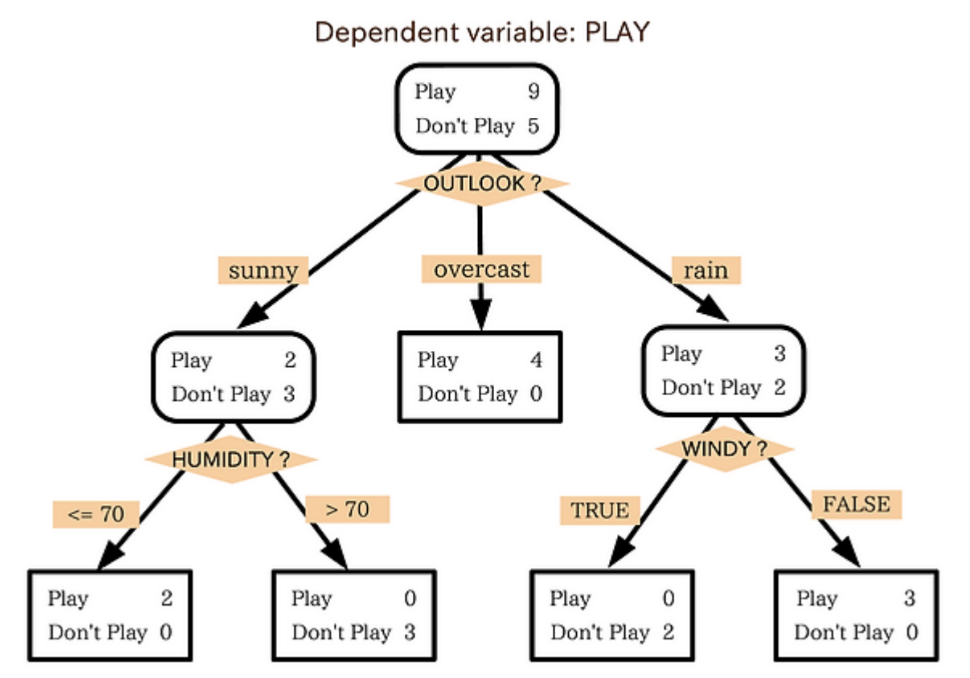

-  운동경기가 열렸다면 PLAY=1, 그렇지 않으면 PLAY=0으로 하는 이진분류(binary classification) 문제
- 모든 사례를 조사해 그림으로 도시하면 위와 같은 그림이 되는 것
- 날씨가 맑고(sunny), 습도(humidity)가 70 이하인 날엔 경기가 열림.
    - 해당 조건에 맞는 데이터들이 ‘경기가 열렸다(play 2건)’고 말하고 있기 때문. 
- 반대로 비가 오고(rain) 바람이 부는(windy) 날엔 경기가 열리지 않음.


#### 의사결정 일반화 그림 
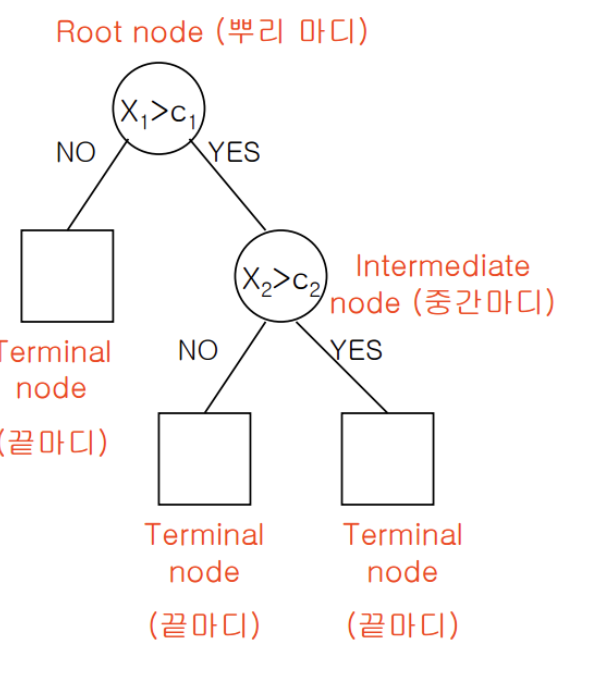

In [3]:
# 데이터
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [4]:
# 전처리 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [6]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


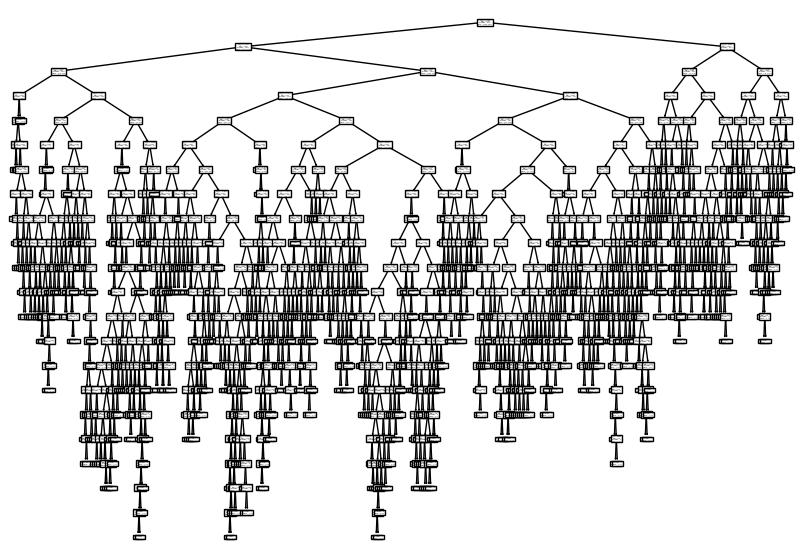

In [8]:
# 훈련된 결정트리 모델을 그림으로 나타내기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) # 그래프사이즈 설정, 가로 세로 inch기준
plot_tree(dt)
plt.show()

- max_depth 매개변수는 입력된 숫자 + 1 의 깊이로 트리가 그려진다.
- filled 매개변수는 클래스에 맞게 노드의 색을 칠한다.
- feature_names 매개변수는 특성의 이름을 전달한다.


<그림>
- samples: 총 샘플 수
- gini: 불순도
- value: 클래스별 샘플 수

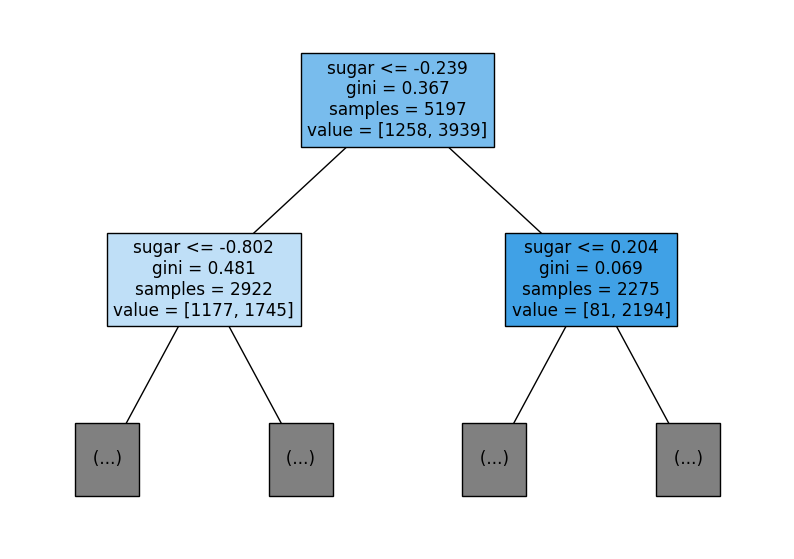

In [13]:
# 트리의 깊이 제한 
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) 
plt.show()

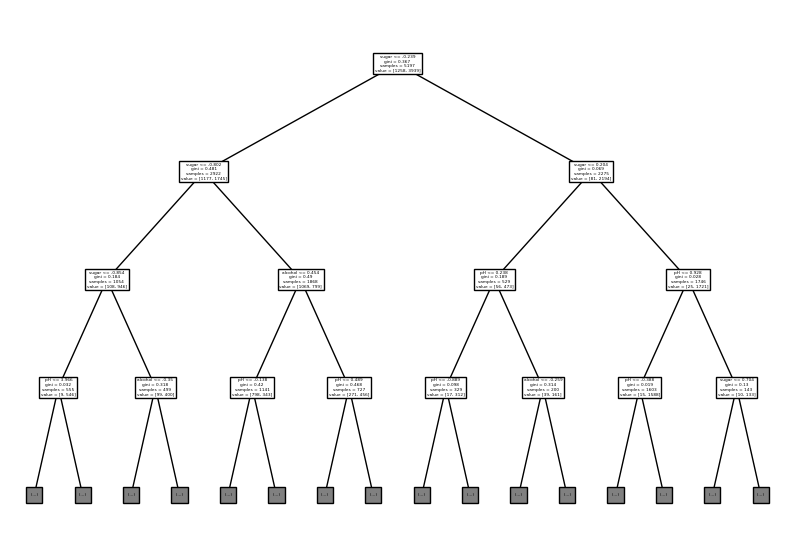

In [14]:
# 트리의 깊이 제한2 옵션 변경 
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=False, feature_names=['alcohol', 'sugar', 'pH']) 
plt.show()

## 정보이득 
- 정보 이론과 머신러닝에서 사용되는 개념 
- 주어진 속성이나 특성을 기준으로 데이터를 분할할 때 얻을 수 있는 정보의 양을 측정하는 지표 
- 엔트로피, 지니불순도 , 분류오차 
- 의사결정트리는 데이터를 분할하는 데에 정보 이득을 최대화 하는 속성을 선택하여 트리를 구성하고 데이터를 가장 효과적으로 분류하고 예측할 수 있는 의사결정규칙을 찾음.
- 즉, 데이터 분할 전후의 불확실성 감소를 측정하여 주어진 속성이나 특성이 분류 작업에 얼마나 유용한 지 평가하는 지표 


## 불순도 
- 결정 트리가 최적의 질문을 하기 위한 기준
- 사이킷런에서는 지니 불순도와 엔트로피 불순도를 제공 
-  분류나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행
- 순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)


### 순도를 계산하는 3가지 방식 


### 1. 엔트로피 
- 불순도를 수치적으로 나타낸 척도 
- 엔트로피가 1이면 불순도가 최대 (불확실성이 높다 , 더 많은 정보를 담고 있다, 압축하기 어렵다)
- 엔트로피가 0이면 불순도가 최소 (불확실성이 낮다, 더 예측 가능하다, 압축하기 쉽다)

#### 공식 
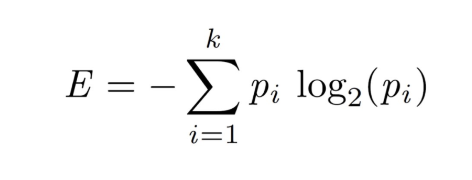

#### 계산 예제 
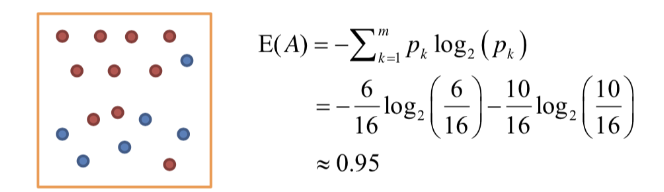

### 2. 지니불순도
- 분류가 완벽히 된 경우 0이 된다. 
- 섞이게 되면 0보다 큰 값을 가진다. 최댓값은 0.5이다. 


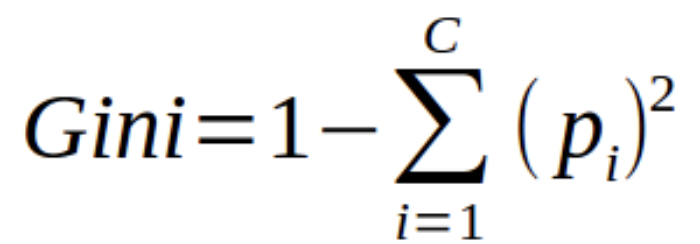
- p는 0~1 사이의 값을 가지는 확률 
- 파란 구슬이 들어있는 비율 p 이면, 빨간 구슬의 비율 (1-p)

### 예제 
- 구슬 10개 중 파란구슬이 3개 있을때, 지니불순도 구하기 
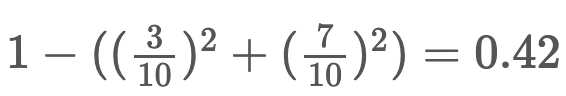

- 42%정도의 불순도

### 3. 오분류오차 (Misclassification error)

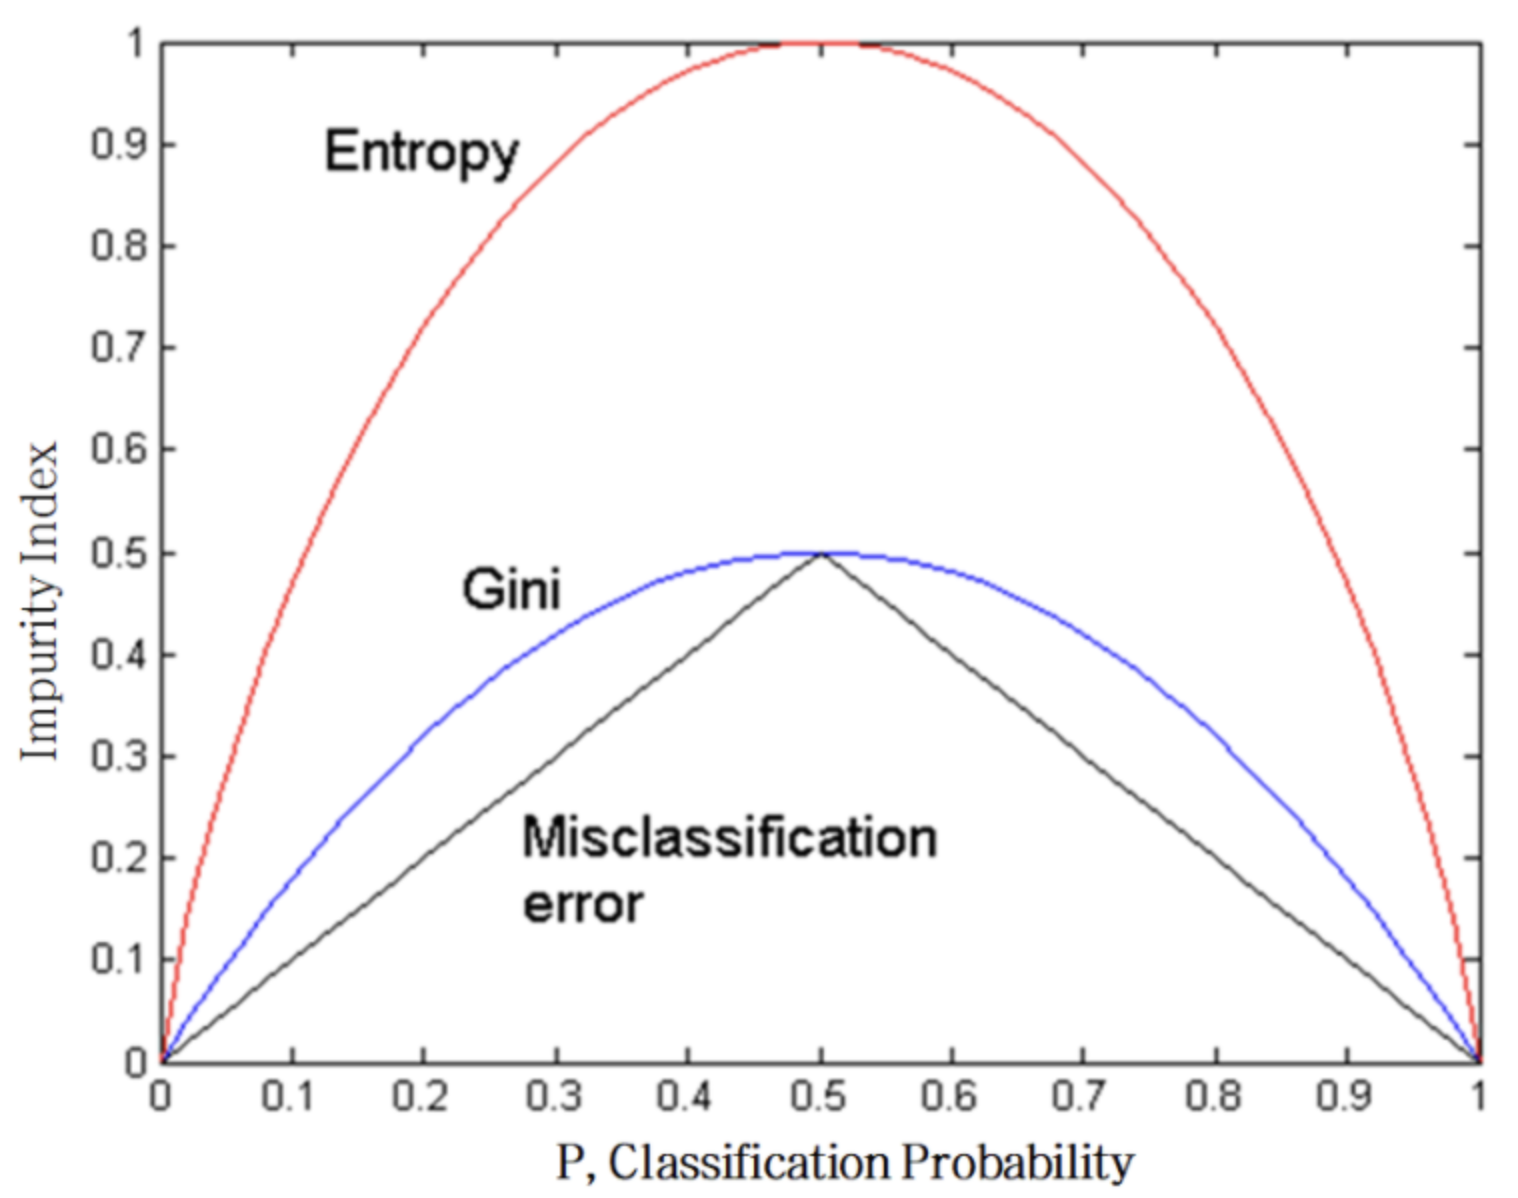

### 가지치기 



## 교차검증과 그리드 서치 


### 검증세트

- 테스트 세트를 사용하지 않으면 모델이 과대적합인지, 과소적합인지 알기 어렵다. 이를 위해서 훈련세트를 한번 더 나누고, 이 데이터를 검증 세트라고 한다.
- 주로 훈련데이터의 20% 를 검증 세트로 

- 아래의 코드train_test_split(data,target,....)와 train_test_split(train_input,train_target...)를 유심히 보자 
- 훈련 세트의 20%를 다시 검증 세트로 나눈 것을 볼 수 있다.


In [ ]:

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#훈련세트를 다시 훈련세트와 검증세트로 나누기
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


### 교차검증 
- 위의 방식으로 검증 세트를 만든다면 훈련세트가 줄어든다.
- 교차검증은 검증세트를 떼어 평가하는 과정을 여러 번 반복한다.
- k-폴드 교차 검증 : 훈련 세트를 k개의 부분으로 나누어 교차검증을 수행하는 것
    - 기본적으로 5-폴드 교차 검증을 수행하며, cv매개변수에서 폴드 수를 바꿀 수 있다.
    - cross_validate() 교차 검증 함수를 사용한다
- cross_validate() 함수:
    - 훈련세트를 섞어 폴드를 나누지 않는다.
    - 회귀모델이면 KFold분할기  -> cv = KFold()
    - 분류모델이면 StratifiedKFold 분할기 -> cv = StratifiedKFold()



In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

## 하이퍼파라미터 튜닝 
- 모델링할 때 사용자가 직접 세팅해주는 값
- 하이퍼 파라미터는 정해진 최적의 값이 없다
- 모델의 매개 변수를 추정하는 데 도움이 되는 프로세스에서 사용된다.
- 학습 알고리즘의 샘플에 대한 일반화를 위해 조절된다.

### 하이퍼파라미터의 예
- 학습률
- 손실 함수
- 일반화 파라미터
- 미니배치 크기
- 에포크 수
- 가중치 초기화
- 은닉층의 개수
- k-NN의 k값

### 하이퍼파라미터의 튜닝 기법
- 그리드 탐색
- 랜덤 탐색
- 베이지안 최적화
- 휴리스틱 탐색

### 그리드 탐색 
#### 정의
- 모델의 성능을 가장 높게 하는 최적의 하이퍼파라미터를 찾는 방법으로, 하이퍼파라미터 후보들을 하나씩 입력해 모델의 성능이 가장 좋게 만드는 값을 찾는다.
- 실험할 하이퍼파라미터들을 명시적으로 정해줘야 함. 

- 탐색을 시작하기 전에, 일정한 간격을 두고 시도해볼 하이퍼파라미터들을 미리 만든다


#### 함수

sklearn.model_selection.GridSearchCV

- 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.

· fit(X, y): 학습

· predict(X): 분류-추론한 class, 회귀-추론한 값

· predict_proba(X): 분류문제에서 class별 확률을 반환 

 

· cv_results_: 파라미터 조합별 평가 결과를 Dictionary로 반환 

· best_params_: 가장 좋은 성능을 낸 parameter 조합을 반환

· best_estimator_: 가장 좋은 성능을 낸 모델 반환 

· best_score_: 가장 좋은 점수 반환 


· estimator: 모델객체 지정

· params: 하이퍼파라미터 목록을 dictionary로 전달 (파라미터명: [파라미터 값 list] 형식)

· scoring: 평가 지표 

   · 평가 지표를 생략할 시 분류: accuarcy, 회귀: R^2를 기본 평가지표로 설정 

   · 평가 지표가 여러 개일 경우, list로 묶어서 지정한다.

· refit: best paramter를 정할 때 사용하는 평가지표로, scoring에 여러 개의 평가지표를 설정한 경우 refit을 반드시 설정해야 한다.

· cv: 교차검증 시 fold 개수 

· n_jobs: 사용할 CPU 코어 개수 (None: 1(기본값), -1: 모든 코어 다 사용)

### 랜덤 탐색 

#### 정의 
- GridSearch와 동일한 방식으로 사용하지만, 모든 조합을 다 시도하지 않고 각 반복마다 임의의 값을 대입해 지정한 횟수만큼만 평가
- 주어진 구간 안에서 랜덤으로 숫자를 뽑아서 실험. 
- 하이퍼파라미터로 시도할 숫자의 구간과, 횟수를 정함.

#### 함수 
sklearn.model_selection.RandomizedSearchCV

· estimator: 모델객체 지정 

· param_distributions: 하이퍼파라미터 목록을 dictionary로 전달 ('파라미터명': [파라미터 값 list] 형식)

· n_iter: 파라미터 검색 횟수

· scoring: 평가 지표

· refit: best parameter를 정할 때 사용하는 평가지표로, scoring에 여러 평가지표를 설정한 경우 설정한다.

· cv: 교차검증 시 fold 개수 

· n_jobs: 사용할 CPU 코어 개수 (None: 1 (기본값), -1: 모든 코어 다 사용) 


#### 결과를 조회할 때 사용하는 속성 값

· cv_results_: 파라미터 조합 별 평가 결과를 Dictionary로 반환

· best_params_: 가장 좋은 성능을 낸 parameter 조합을 반환 

· best_estimators_: 가장 좋은 성능을 낸 모델 반환

· best_score_: 가장 좋은 점수를 반환

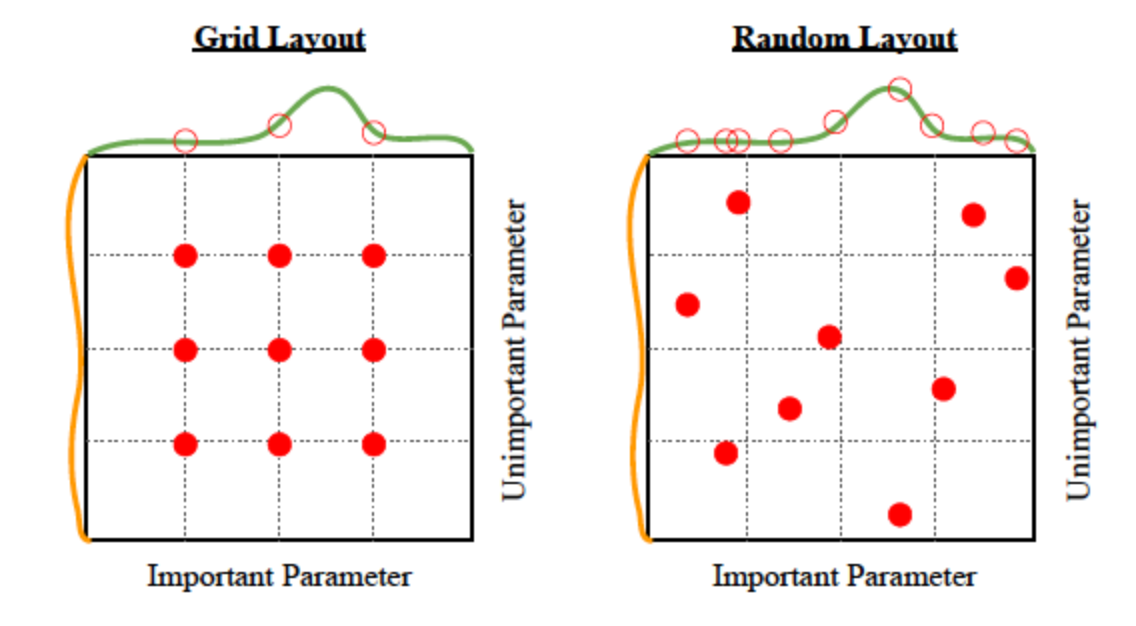

- 각각의 박스 위에 그려진 곡선은 모델의 성능을 나타냄
- 빨간 점은 시도해본 하이퍼파라미터
- Grid를 만들어서 하이퍼파라미터를 찾는 것보다, 랜덤으로 숫자를 뽑아서 그걸 하이퍼파라미터로 시도해보는 것이 더 좋은 성능의 모델을 찾는 확률을 높힐 수 있음.



# 앙상블 학습 
- 더 좋은 예측 결과를 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘
- 여러 개의 분류기를 생성하고, 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법
- 강력한 하나의 모델을 사용하는대신 보다 약한 모델 여러개를 조합하여 더 정확한 예측에 도움을 주는 방식 즉, 약한 분류기들을 모아 결합하여 하나의 강한 분류기를 만들어 내는 것 


## 랜덤포레스트
- 배깅과 특성 무작위성을 모두 활용하여 상관관계가 없는 의사결정 트리의 포레스트를 만드는 것, 변수를 랜덤으로 선택하는 과정을 통해 개별 나무들의 상관성을 줄여 예측력을 향상
-  분류 및 회귀 작업에 사용할 수 있다는 사실과 비선형 특성을 결합하면 다양한 데이터 및 상황에 매우 적합
- 랜덤 포레스트는 기능을 무작위로 선택하고 관찰하여 의사 결정 트리의 포리스트를 만든 다음 결과를 평균화
- 배깅을 사용하는 앙상블 모형 
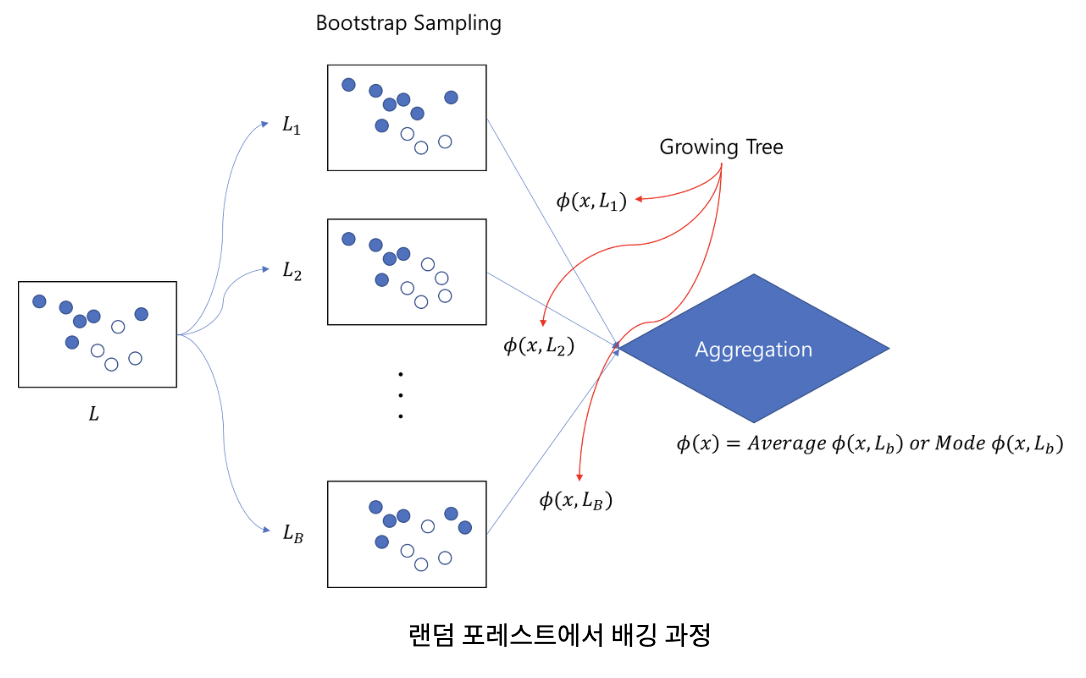

- 각 분리마다 변수 후보를 랜덤하게 선택하는 것 
- 변수 후보를 한 번만 랜덤하게 선택해놓고 그 변수들만 가지고 분리하는 것이 아님에 주의 
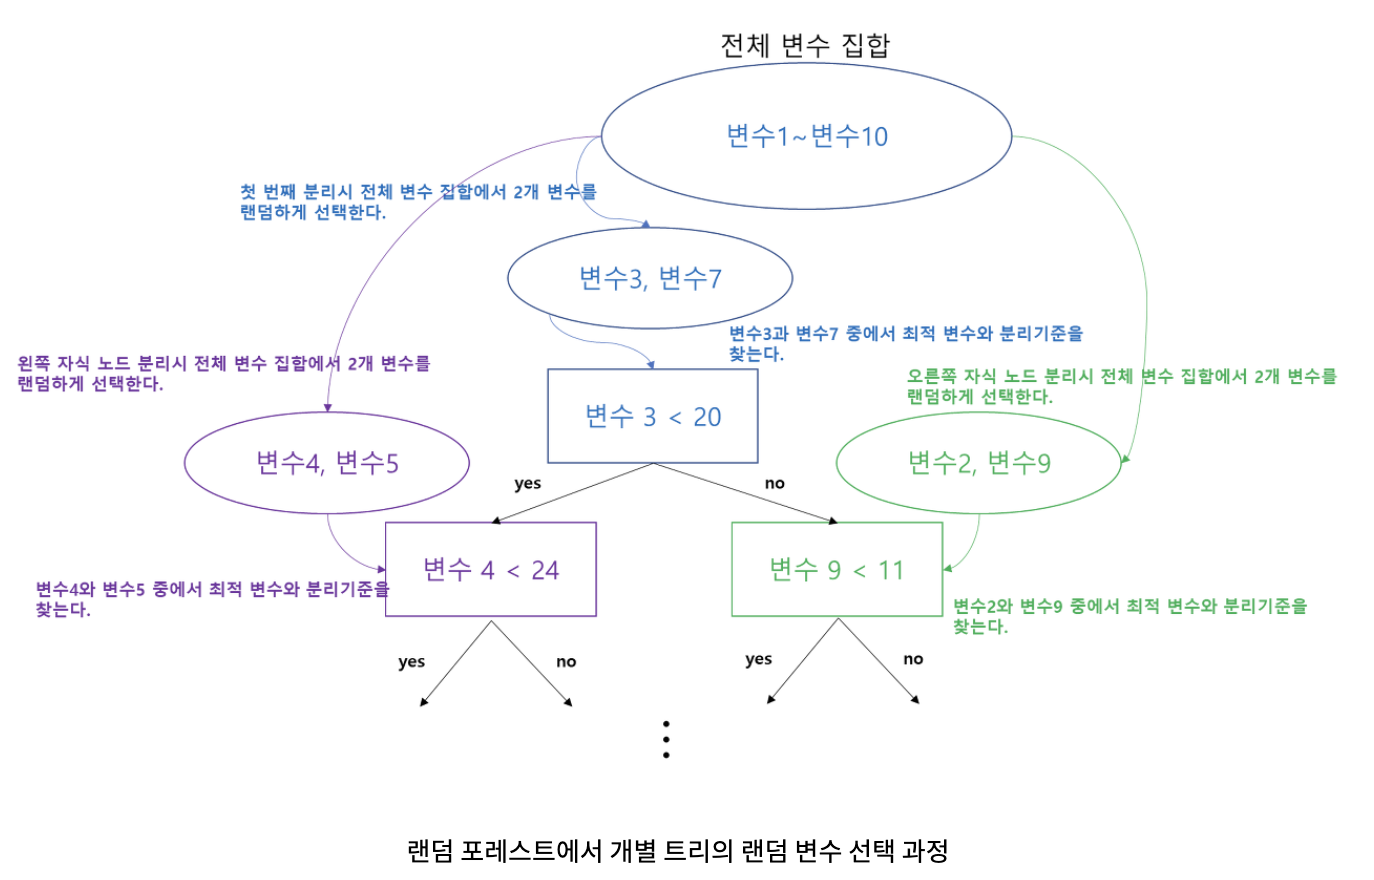


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [ ]:
# 특성 중요도 계산
rf.fit(train_input, train_target)
print(rf.feature_importances_)

- RandomForestClassifier에는 자체적으로 모델을 평가하는 점수를 얻을 수 있다.

- 부트스트래핑을 할때,부트스트랩 샘플에 포함되지 않고 남은 샘플(=OOB샘플)로 훈련한 결정트리를 평가할 수 있다.(이때 OOB샘플은 검증 세트의 역할을 하는 셈이다) 이 점수를 얻으려면 매개변수 oob_score를 True로 지정해야 한다.

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

## 엑스트라 트리 
- 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다.
- 랜덤포레스트와 달리 DecisionTreeClassifier(splitter = 'random')을 사용하고 부트스트랩 샘플링을 적용하지 않는다. 
- 무작위성을 증가시키면 모델의 편향이 늘어나지만 분산은 감소한다.
- 예측 방식은 각 트리가 만든 확률값을 평균한다.

- 랜덤 포레스트와 비슷하게 동작하지만, 엑스트라 트리는 부트스트랩 샘플을 사용하지 않고 결정트리를 만들때 전체 훈련 세트를 사용한다.

- 대신 노드를 분할할때 무작위로 분할하게 된다(spliter=random)

- 성능은 낮아질 수 있지만 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증세트의 점수를 높이는 효과가 있다.

- 사이킷런에서 제공하는 엑스트라 트리는 ExtraTreesClassifier이다.

- 그 외 매개변수는 랜덤포레스트와 거의 동일하다.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

## 그레디언트 부스팅 

- 깊이가 얕은 결정 트리를 사용하여 이진트리의 오차를 보완하는 방식으로 앙상블 하는 방법
- 선형회귀와 같은 작동방식은 아니지만 실제값과 예측값 차이인 잔차를 학습해 나가며 잔차를 줄여나가는 방식 즉, 이전 학습기의 잔차를 다음 학습기가 학습하고 학습기를 계속 추가해 가면서 잔차를 줄여나가는 방식 
- 경사하강법을 사용하여 트리를 앙상블에 추가하며, 분류에서는 로지스틱 손실 함수를, 회귀에서는 평균 제곱 오차 함수를 사용한다.

- 일반적으로 그레이디언트 부스팅이 랜덤 포레스트보다 조금 더 높은 성능을 얻을 수 있다. 하지만 순서대로 트리를 추가하기 때문에 훈련 속도가 느리다.(그래서 GradientBoostingClassifier에는 n_jobs가 없다.)

- 사이킷런에서 제공하는 그레이디언트 부스팅 클래스는 GradientBoostingClassifier이다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

 
- 결정 트리에는 아래와 같은 매개변수들이 있다.

1) n_estimators : 사용할 결정 트리의 개수, 기본값은 100이다.

2) learning_rate: 학습률, 기본값은 0.1이다.